# Chess Games Analysis

This notebook analyzes 6.25 million chess games from lichess.org played in July 2016.

## Objectives
- Explore game patterns and player behavior
- Analyze opening preferences and outcomes
- Examine rating distributions and changes
- Investigate time control effects
- Study game termination patterns

In [24]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Import utilities
from utils import load_chess_data, preprocess_data, get_opening_category, calculate_game_duration

In [25]:
# Load data (using sample for faster processing - adjust sample_size as needed)
# For full analysis, set sample_size=None, but it will take longer
print("Loading chess games data...")
df_raw = load_chess_data('chess_games.csv', sample_size=500000)
print(f"Loaded {len(df_raw):,} games")
print(f"Columns: {df_raw.columns.tolist()}")
df_raw.head()

Loading chess games data...
Loaded 500,000 games
Columns: ['Event', 'White', 'Black', 'Result', 'UTCDate', 'UTCTime', 'WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff', 'ECO', 'Opening', 'TimeControl', 'Termination', 'AN']


,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
104241,Blitz,penitenciaria,Cellad99,0-1,2016.07.01,13:29:02,1967,2047,-8.0,9.0,E21,Nimzo-Indian Defense: Three Knights Variation,180+0,Normal,1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Nf3 Bxc3+ 5. ...
199676,Classical,FahadSaif,ubuntu123,1-0,2016.07.01,22:06:55,1400,1459,20.0,-21.0,A00,Van't Kruijs Opening,300+5,Normal,1. e3 e6 2. Nh3 Nf6 3. Ng5 Nd5 4. Qf3 Qxg5 5. ...
140199,Classical,CommandosYNWA,grom1,0-1,2016.07.01,16:39:15,1670,1930,-4.0,32.0,B12,"Caro-Kann Defense: Advance Variation, Short Va...",900+0,Normal,1. e4 { [%eval 0.21] } 1... c6 { [%eval 0.45] ...
132814,Blitz tournament,SR83,Cascor,1/2-1/2,2016.07.01,16:02:49,2229,1902,-9.0,8.0,D37,Queen's Gambit Declined: Barmen Variation,180+0,Normal,1. d4 Nf6 2. c4 e6 3. Nf3 d5 4. Nc3 Nbd7 5. Bg...
408697,Bullet,Hemericus,pree,0-1,2016.07.03,00:08:01,1958,2123,-6.0,7.0,D43,Semi-Slav Defense,60+0,Time forfeit,1. d4 Nf6 2. c4 e6 3. Nc3 d5 4. Nf3 c6 5. Bg5 ...


In [26]:
# Preprocess data
df = preprocess_data(df_raw)
print(f"Data shape: {df.shape}")
print(f"\nMissing values:\n{df.isnull().sum()}")
df.head()

Data shape: (500000, 28)

Missing values:
Event                       0
White                       0
Black                       0
Result                      0
UTCDate                     0
UTCTime                     0
WhiteElo                    0
BlackElo                    0
WhiteRatingDiff           222
BlackRatingDiff           222
ECO                         0
Opening                     0
TimeControl                 0
Termination                 0
AN                          0
DateTime                    0
Date                        0
Hour                        0
DayOfWeek                   0
TimeControl_Base            0
TimeControl_Increment    1927
TimeControl_Grouped         0
AvgElo                      0
EloDiff                     0
WhiteWins                   0
BlackWins                   0
Draw                        0
MoveCount                   0
dtype: int64


,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,...,DayOfWeek,TimeControl_Base,TimeControl_Increment,TimeControl_Grouped,AvgElo,EloDiff,WhiteWins,BlackWins,Draw,MoveCount
104241,Blitz,penitenciaria,Cellad99,0-1,2016.07.01,13:29:02,1967,2047,-8.0,9.0,...,Friday,180,0.0,Blitz (3-10min),2007.0,80,0,1,0,31
199676,Classical,FahadSaif,ubuntu123,1-0,2016.07.01,22:06:55,1400,1459,20.0,-21.0,...,Friday,300,5.0,Blitz (3-10min),1429.5,59,1,0,0,18
140199,Classical,CommandosYNWA,grom1,0-1,2016.07.01,16:39:15,1670,1930,-4.0,32.0,...,Friday,900,0.0,Rapid (10-60min),1800.0,260,0,1,0,166
132814,Blitz tournament,SR83,Cascor,1/2-1/2,2016.07.01,16:02:49,2229,1902,-9.0,8.0,...,Friday,180,0.0,Blitz (3-10min),2065.5,327,0,0,1,64
408697,Bullet,Hemericus,pree,0-1,2016.07.03,00:08:01,1958,2123,-6.0,7.0,...,Sunday,60,0.0,Bullet (<3min),2040.5,165,0,1,0,25


## Analytical Questions and Visualizations

### Question 1: What is the distribution of game results (White wins, Black wins, Draws)?

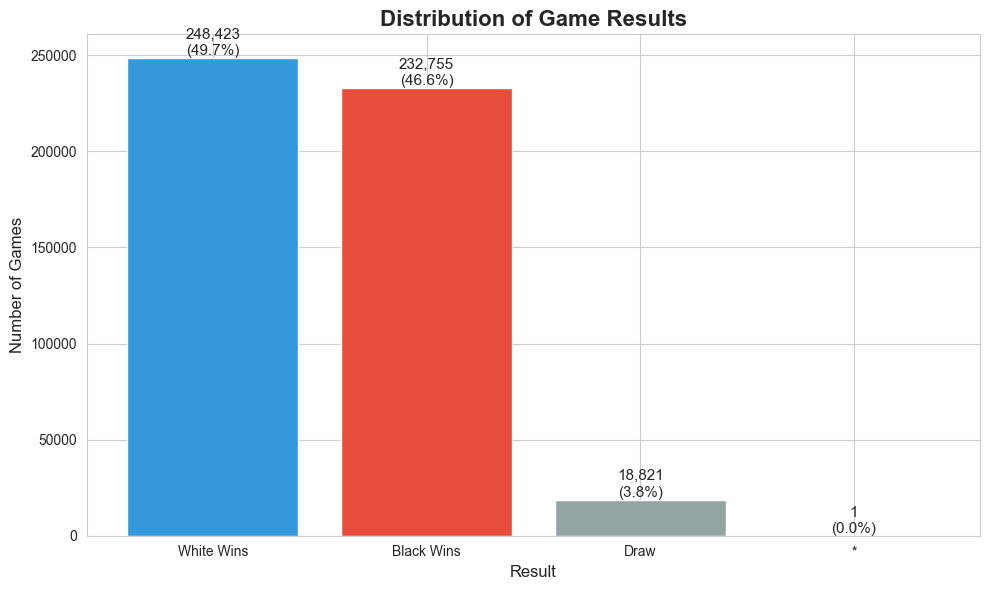


Summary:
White Wins: 248,423 (49.68%)
Black Wins: 232,755 (46.55%)
Draws: 18,821 (3.76%)


In [27]:
# Q1: Game results distribution
result_counts = df['Result'].value_counts()
result_labels = {'1-0': 'White Wins', '0-1': 'Black Wins', '1/2-1/2': 'Draw'}
result_counts_labeled = result_counts.rename(index=result_labels)

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#3498db', '#e74c3c', '#95a5a6']
bars = ax.bar(result_counts_labeled.index, result_counts_labeled.values, color=colors)
ax.set_title('Distribution of Game Results', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Games', fontsize=12)
ax.set_xlabel('Result', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}\n({height/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nSummary:")
print(f"White Wins: {result_counts.get('1-0', 0):,} ({result_counts.get('1-0', 0)/len(df)*100:.2f}%)")
print(f"Black Wins: {result_counts.get('0-1', 0):,} ({result_counts.get('0-1', 0)/len(df)*100:.2f}%)")
print(f"Draws: {result_counts.get('1/2-1/2', 0):,} ({result_counts.get('1/2-1/2', 0)/len(df)*100:.2f}%)")

### Question 2: How are player ELO ratings distributed?

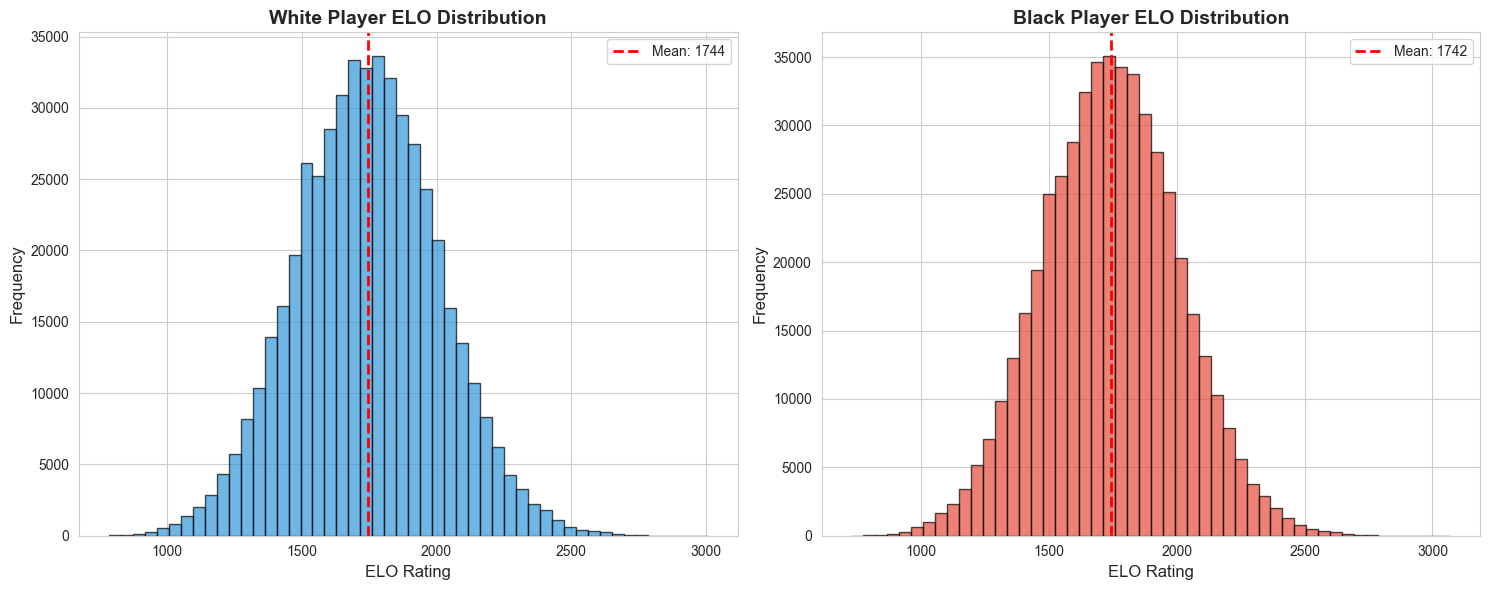


ELO Statistics:
White ELO - Mean: 1743.82, Median: 1744.00, Std: 264.40
Black ELO - Mean: 1742.10, Median: 1742.00, Std: 265.97


In [28]:
# Q2: ELO rating distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# White ELO distribution
axes[0].hist(df['WhiteElo'].dropna(), bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].set_title('White Player ELO Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('ELO Rating', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(df['WhiteElo'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["WhiteElo"].mean():.0f}')
axes[0].legend()

# Black ELO distribution
axes[1].hist(df['BlackElo'].dropna(), bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[1].set_title('Black Player ELO Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('ELO Rating', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].axvline(df['BlackElo'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["BlackElo"].mean():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nELO Statistics:")
print(f"White ELO - Mean: {df['WhiteElo'].mean():.2f}, Median: {df['WhiteElo'].median():.2f}, Std: {df['WhiteElo'].std():.2f}")
print(f"Black ELO - Mean: {df['BlackElo'].mean():.2f}, Median: {df['BlackElo'].median():.2f}, Std: {df['BlackElo'].std():.2f}")

### Question 3: Does ELO difference between players affect game outcomes?

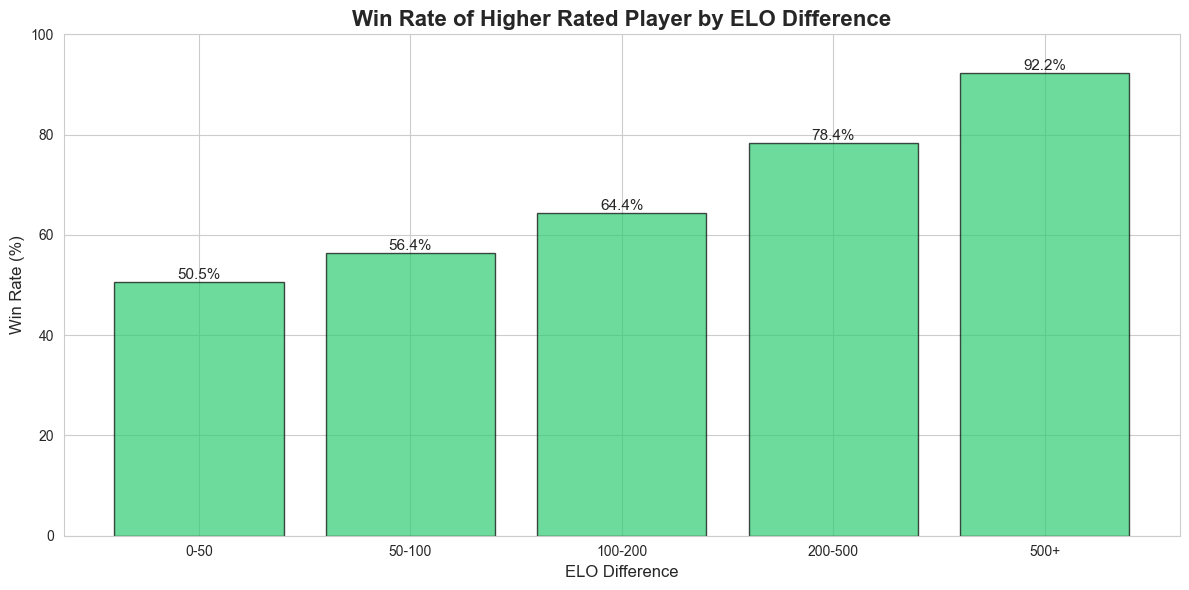


Higher rated player win rate by ELO difference:
0-50: 50.55%
50-100: 56.44%
100-200: 64.45%
200-500: 78.35%
500+: 92.21%


In [29]:
# Q3: ELO difference vs game outcome
df['EloDiff'] = abs(df['WhiteElo'] - df['BlackElo'])
df['HigherEloWins'] = ((df['WhiteElo'] > df['BlackElo']) & (df['Result'] == '1-0')) | \
                      ((df['BlackElo'] > df['WhiteElo']) & (df['Result'] == '0-1'))

# Create bins for ELO difference
df['EloDiffBin'] = pd.cut(df['EloDiff'], bins=[0, 50, 100, 200, 500, 1000],
                          labels=['0-50', '50-100', '100-200', '200-500', '500+'])

win_rate_by_elo_diff = df.groupby('EloDiffBin')['HigherEloWins'].mean() * 100

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(win_rate_by_elo_diff.index.astype(str), win_rate_by_elo_diff.values,
              color='#2ecc71', edgecolor='black', alpha=0.7)
ax.set_title('Win Rate of Higher Rated Player by ELO Difference', fontsize=16, fontweight='bold')
ax.set_xlabel('ELO Difference', fontsize=12)
ax.set_ylabel('Win Rate (%)', fontsize=12)
ax.set_ylim([0, 100])

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nHigher rated player win rate by ELO difference:")
for bin_label, rate in win_rate_by_elo_diff.items():
    print(f"{bin_label}: {rate:.2f}%")

### Question 4: What are the most popular chess openings?

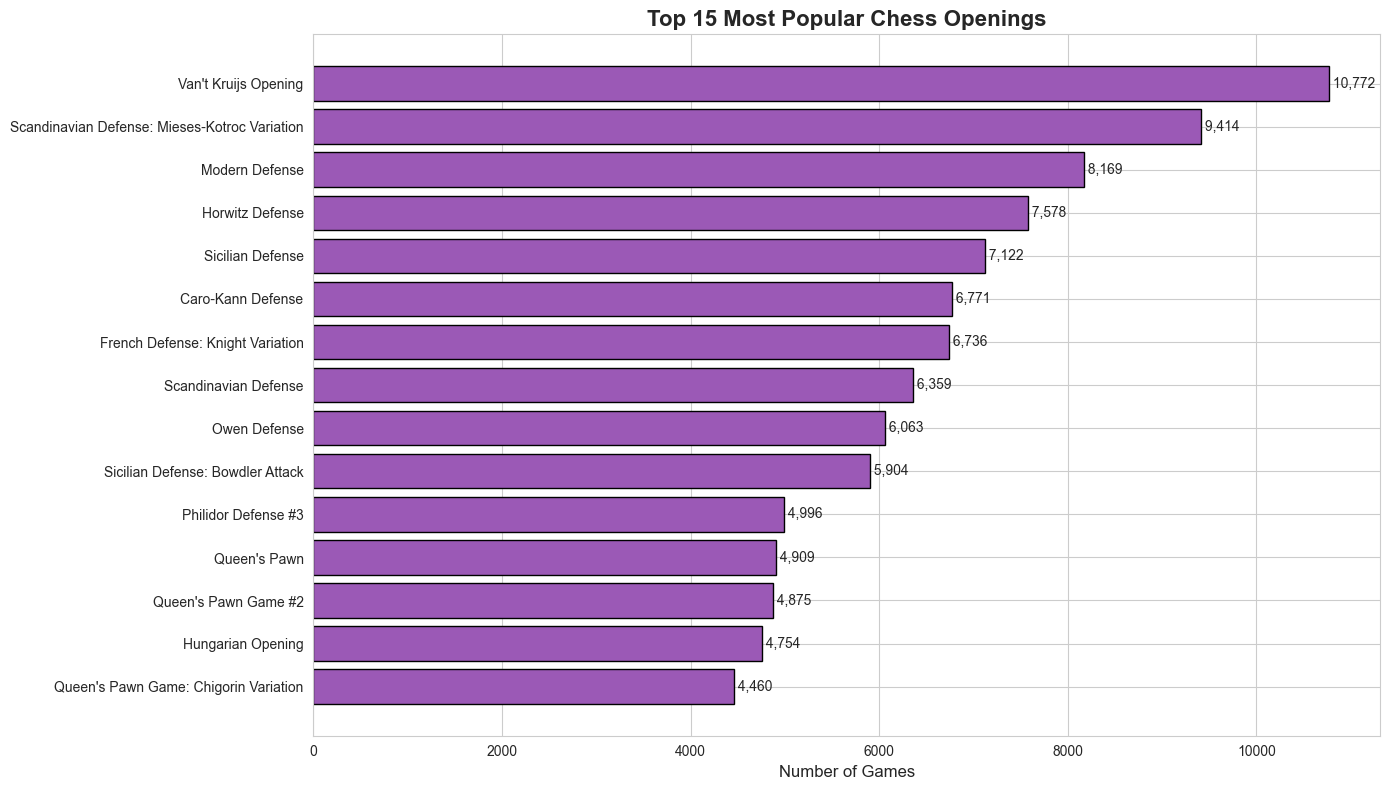


Top 10 Openings:
1. Van't Kruijs Opening: 10,772 games (2.15%)
2. Scandinavian Defense: Mieses-Kotroc Variation: 9,414 games (1.88%)
3. Modern Defense: 8,169 games (1.63%)
4. Horwitz Defense: 7,578 games (1.52%)
5. Sicilian Defense: 7,122 games (1.42%)
6. Caro-Kann Defense: 6,771 games (1.35%)
7. French Defense: Knight Variation: 6,736 games (1.35%)
8. Scandinavian Defense: 6,359 games (1.27%)
9. Owen Defense: 6,063 games (1.21%)
10. Sicilian Defense: Bowdler Attack: 5,904 games (1.18%)


In [30]:
# Q4: Most popular openings
top_openings = df['Opening'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(range(len(top_openings)), top_openings.values, color='#9b59b6', edgecolor='black')
ax.set_yticks(range(len(top_openings)))
ax.set_yticklabels(top_openings.index, fontsize=10)
ax.set_xlabel('Number of Games', fontsize=12)
ax.set_title('Top 15 Most Popular Chess Openings', fontsize=16, fontweight='bold')
ax.invert_yaxis()

# Add value labels
for i, (idx, val) in enumerate(top_openings.items()):
    ax.text(val, i, f' {int(val):,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nTop 10 Openings:")
for i, (opening, count) in enumerate(top_openings.head(10).items(), 1):
    print(f"{i}. {opening}: {count:,} games ({count/len(df)*100:.2f}%)")

### Question 5: How do opening categories (ECO codes) affect game outcomes?

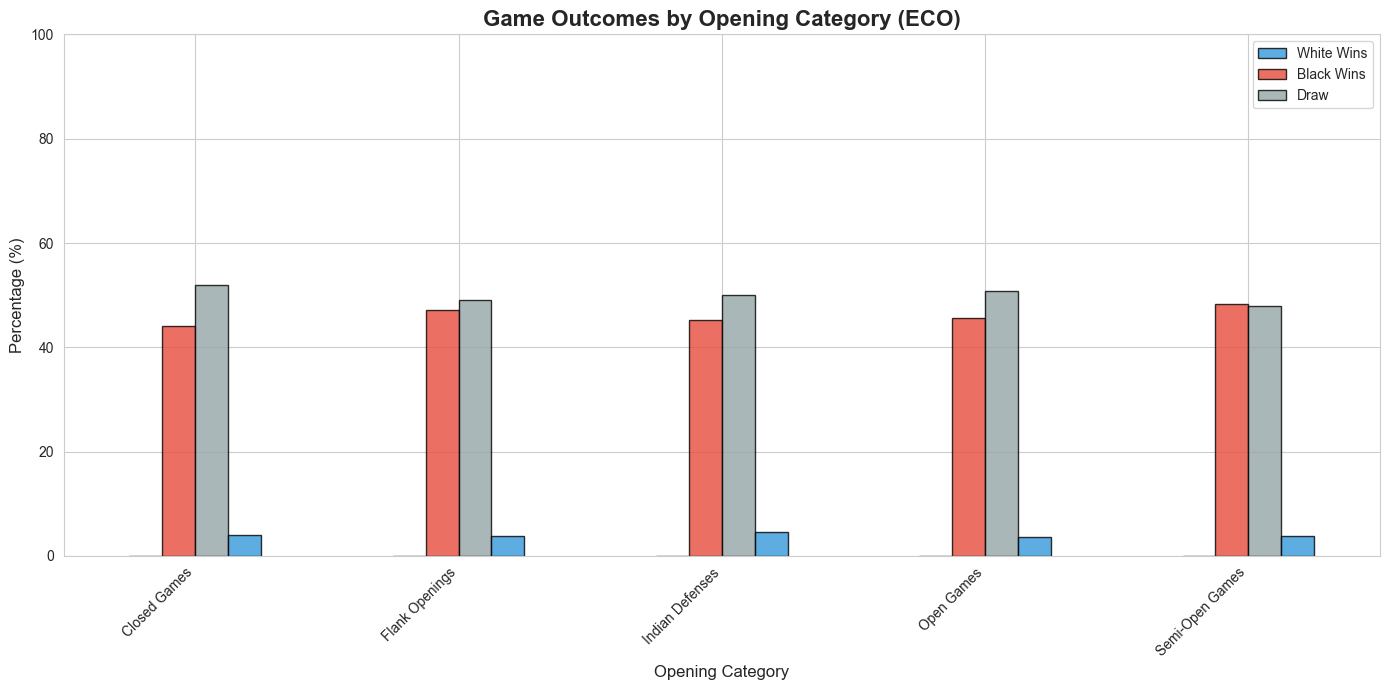


Outcomes by Opening Category:
Result             *    0-1    1-0  1/2-1/2
OpeningCategory                            
Closed Games     0.0  44.03  51.92     4.06
Flank Openings   0.0  47.17  49.08     3.75
Indian Defenses  0.0  45.32  50.10     4.58
Open Games       0.0  45.54  50.88     3.58
Semi-Open Games  0.0  48.33  47.89     3.78


In [31]:
# Q5: Opening categories and outcomes
df['OpeningCategory'] = df['ECO'].apply(get_opening_category)

opening_outcomes = df.groupby('OpeningCategory')['Result'].value_counts(normalize=True).unstack(fill_value=0) * 100

fig, ax = plt.subplots(figsize=(14, 7))
opening_outcomes.plot(kind='bar', ax=ax, color=['#3498db', '#e74c3c', '#95a5a6'],
                     edgecolor='black', alpha=0.8)
ax.set_title('Game Outcomes by Opening Category (ECO)', fontsize=16, fontweight='bold')
ax.set_xlabel('Opening Category', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(['White Wins', 'Black Wins', 'Draw'], loc='upper right')
ax.set_ylim([0, 100])

plt.tight_layout()
plt.show()

print(f"\nOutcomes by Opening Category:")
print(opening_outcomes.round(2))

### Question 6: What time controls are most popular?

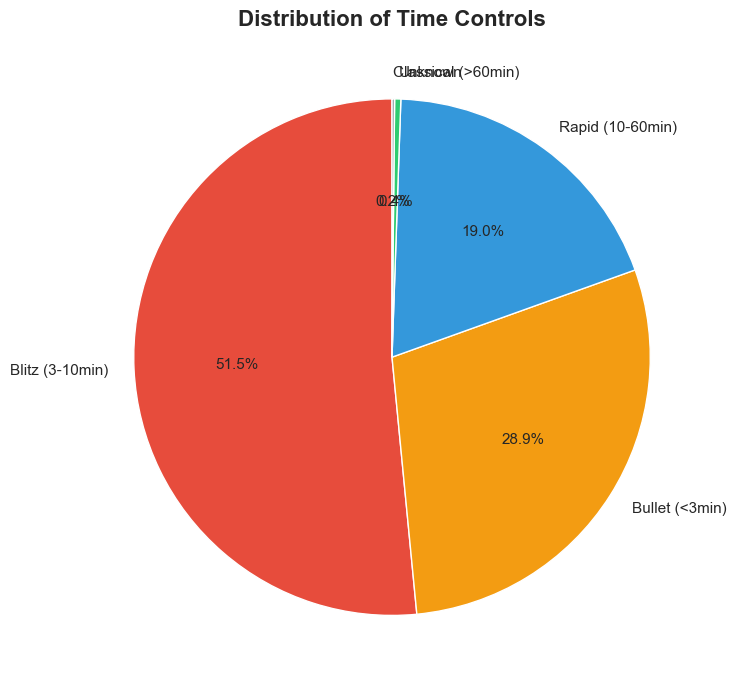


Time Control Distribution:
Blitz (3-10min): 257,667 games (51.53%)
Bullet (<3min): 144,747 games (28.95%)
Rapid (10-60min): 94,855 games (18.97%)
Unknown: 1,927 games (0.39%)
Classical (>60min): 804 games (0.16%)


In [32]:
# Q6: Time control distribution
# Group similar time controls
def categorize_time_control(x):
    """Categorize time control into groups"""
    if pd.isna(x):
        return 'Unknown'
    try:
        # Handle string values that might contain '-' or other invalid formats
        x_str = str(x)
        if '+' in x_str:
            base_time = float(x_str.split('+')[0])
        else:
            # Try to convert the whole string
            base_time = float(x_str)

        if base_time < 180:
            return 'Bullet (<3min)'
        elif base_time < 600:
            return 'Blitz (3-10min)'
        elif base_time < 3600:
            return 'Rapid (10-60min)'
        else:
            return 'Classical (>60min)'
    except (ValueError, AttributeError):
        return 'Unknown'

df['TimeControl_Grouped'] = df['TimeControl'].apply(categorize_time_control)

time_control_counts = df['TimeControl_Grouped'].value_counts()

fig, ax = plt.subplots(figsize=(12, 7))
colors = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71', '#95a5a6']
wedges, texts, autotexts = ax.pie(time_control_counts.values, labels=time_control_counts.index,
                                  autopct='%1.1f%%', colors=colors[:len(time_control_counts)],
                                  startangle=90, textprops={'fontsize': 11})
ax.set_title('Distribution of Time Controls', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTime Control Distribution:")
for tc, count in time_control_counts.items():
    print(f"{tc}: {count:,} games ({count/len(df)*100:.2f}%)")

### Question 7: How does time control affect game outcomes?

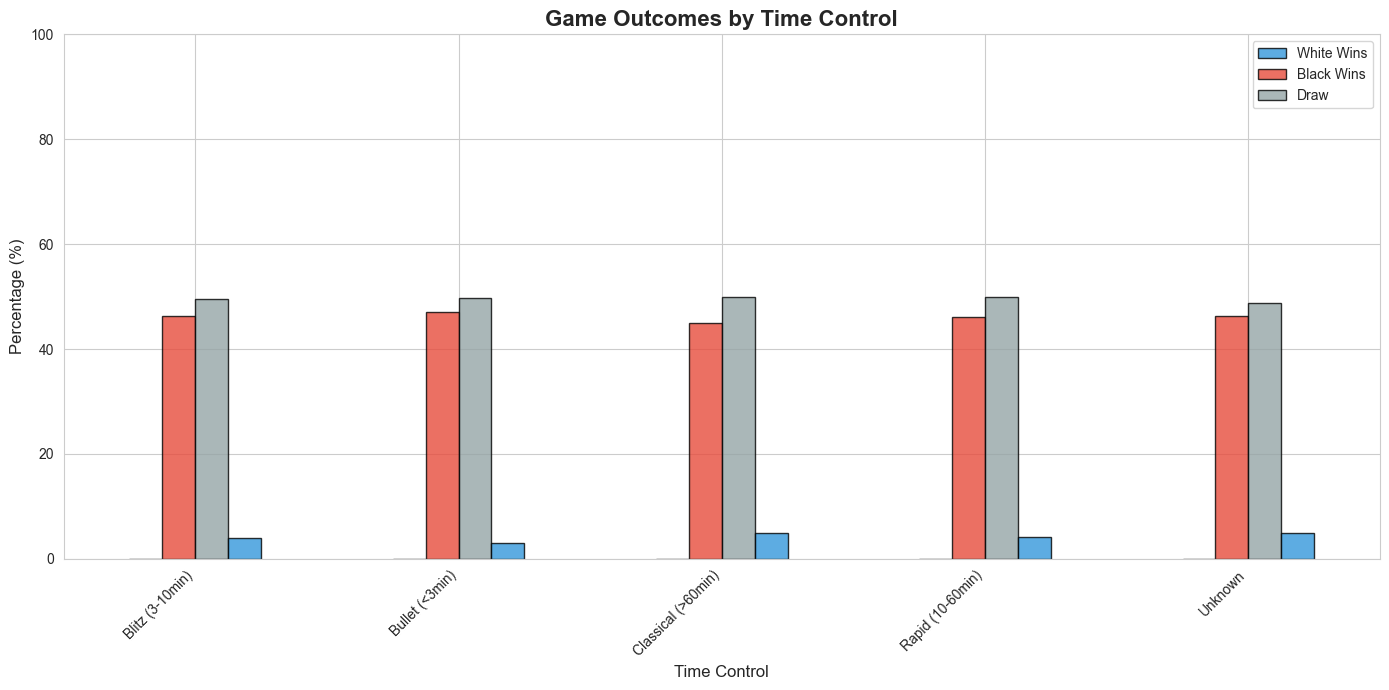


Outcomes by Time Control:
Result                 *    0-1    1-0  1/2-1/2
TimeControl_Grouped                            
Blitz (3-10min)      0.0  46.39  49.56     4.05
Bullet (<3min)       0.0  47.16  49.81     3.03
Classical (>60min)   0.0  45.02  50.00     4.98
Rapid (10-60min)     0.0  46.09  49.84     4.07
Unknown              0.0  46.24  48.78     4.98


In [33]:
# Q7: Time control vs outcomes
time_outcomes = df.groupby('TimeControl_Grouped')['Result'].value_counts(normalize=True).unstack(fill_value=0) * 100

fig, ax = plt.subplots(figsize=(14, 7))
time_outcomes.plot(kind='bar', ax=ax, color=['#3498db', '#e74c3c', '#95a5a6'],
                  edgecolor='black', alpha=0.8)
ax.set_title('Game Outcomes by Time Control', fontsize=16, fontweight='bold')
ax.set_xlabel('Time Control', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(['White Wins', 'Black Wins', 'Draw'], loc='upper right')
ax.set_ylim([0, 100])

plt.tight_layout()
plt.show()

print(f"\nOutcomes by Time Control:")
print(time_outcomes.round(2))

### Question 8: What are the most common reasons for game termination?

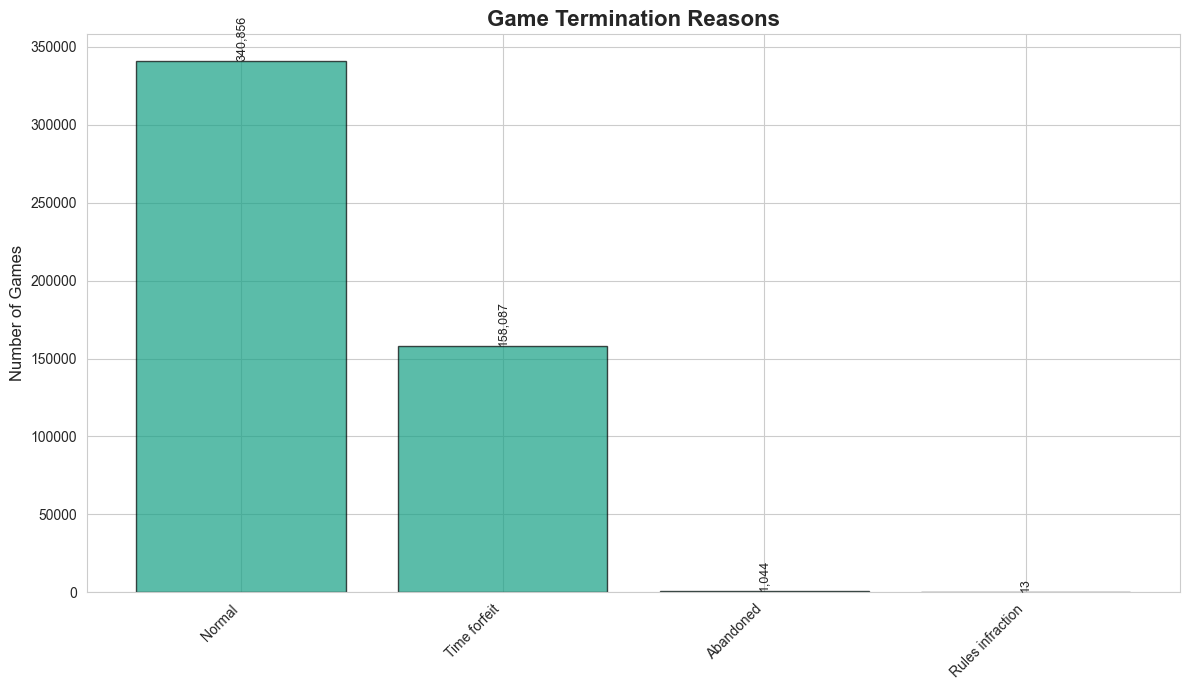


Termination Reasons:
Normal: 340,856 games (68.17%)
Time forfeit: 158,087 games (31.62%)
Abandoned: 1,044 games (0.21%)
Rules infraction: 13 games (0.00%)


In [34]:
# Q8: Game termination reasons
termination_counts = df['Termination'].value_counts()

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.bar(range(len(termination_counts)), termination_counts.values,
              color='#16a085', edgecolor='black', alpha=0.7)
ax.set_xticks(range(len(termination_counts)))
ax.set_xticklabels(termination_counts.index, rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Number of Games', fontsize=12)
ax.set_title('Game Termination Reasons', fontsize=16, fontweight='bold')

# Add value labels
for i, (term, count) in enumerate(termination_counts.items()):
    ax.text(i, count, f'{int(count):,}', ha='center', va='bottom', fontsize=9, rotation=90)

plt.tight_layout()
plt.show()

print(f"\nTermination Reasons:")
for term, count in termination_counts.items():
    print(f"{term}: {count:,} games ({count/len(df)*100:.2f}%)")

### Question 9: How do games vary throughout the day?

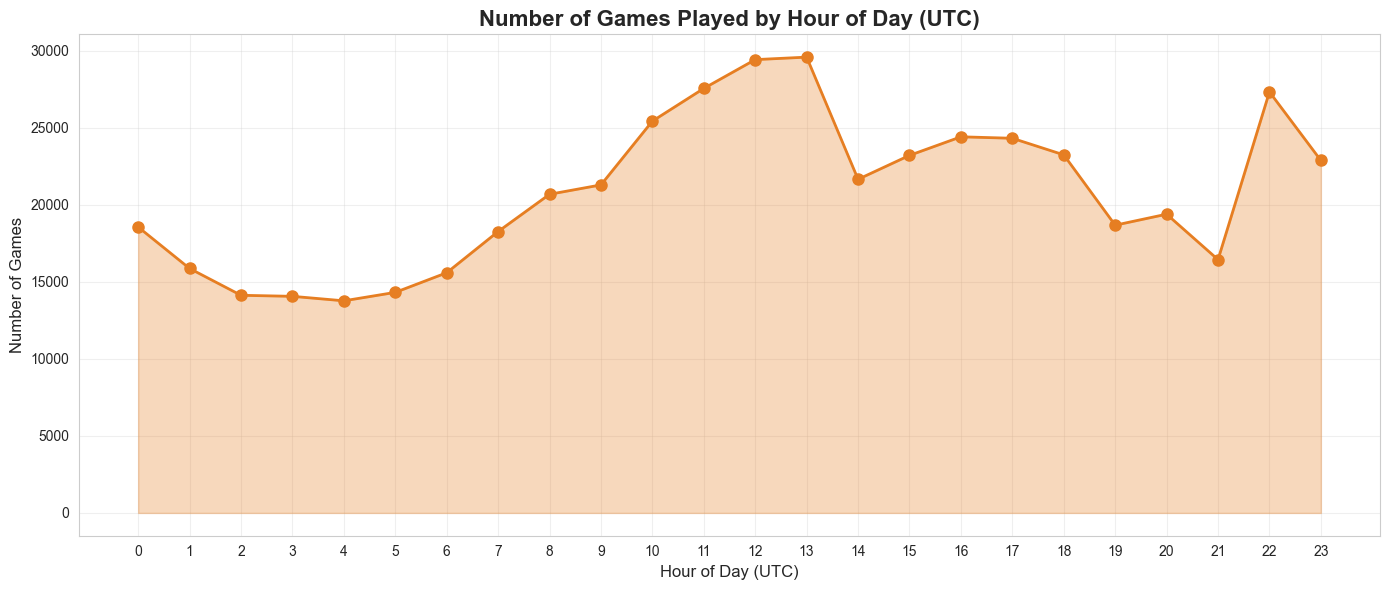


Peak playing hour: 13:00 UTC (29,581 games)
Lowest playing hour: 4:00 UTC (13,766 games)


In [35]:
# Q9: Games by hour of day
games_by_hour = df['Hour'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(games_by_hour.index, games_by_hour.values, marker='o', linewidth=2,
        markersize=8, color='#e67e22')
ax.fill_between(games_by_hour.index, games_by_hour.values, alpha=0.3, color='#e67e22')
ax.set_title('Number of Games Played by Hour of Day (UTC)', fontsize=16, fontweight='bold')
ax.set_xlabel('Hour of Day (UTC)', fontsize=12)
ax.set_ylabel('Number of Games', fontsize=12)
ax.set_xticks(range(0, 24))
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

peak_hour = games_by_hour.idxmax()
print(f"\nPeak playing hour: {peak_hour}:00 UTC ({games_by_hour.max():,} games)")
print(f"Lowest playing hour: {games_by_hour.idxmin()}:00 UTC ({games_by_hour.min():,} games)")

### Question 10: What is the relationship between average ELO and draw rate?

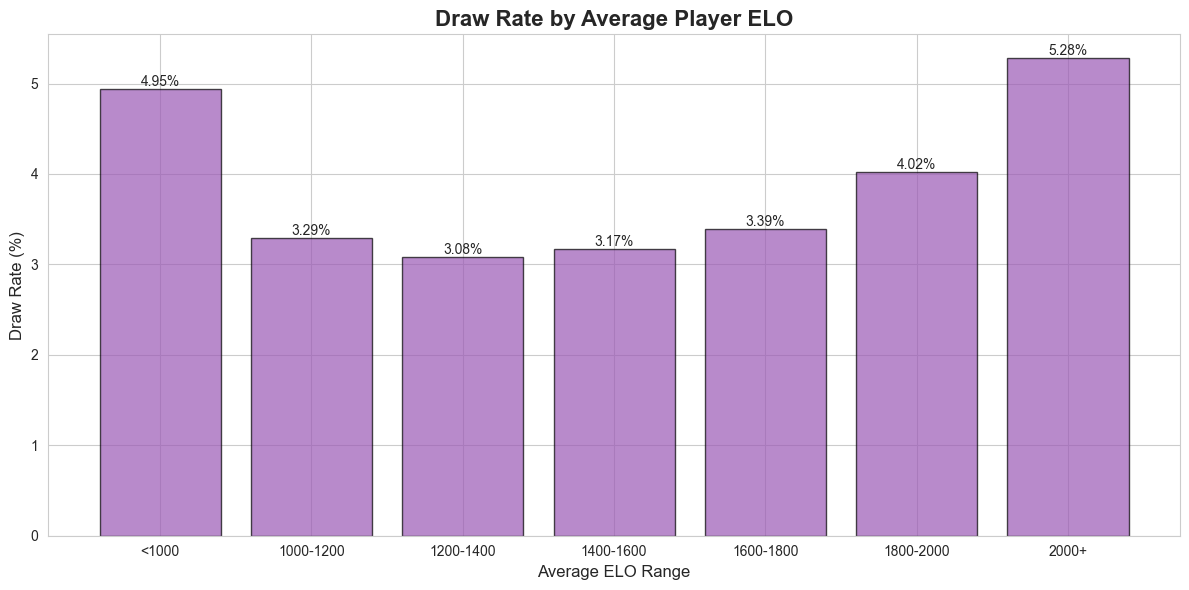


Draw Rate by Average ELO:
<1000: 4.95%
1000-1200: 3.29%
1200-1400: 3.08%
1400-1600: 3.17%
1600-1800: 3.39%
1800-2000: 4.02%
2000+: 5.28%


In [36]:
# Q10: Average ELO vs draw rate
df['AvgEloBin'] = pd.cut(df['AvgElo'], bins=[0, 1000, 1200, 1400, 1600, 1800, 2000, 3000],
                         labels=['<1000', '1000-1200', '1200-1400', '1400-1600',
                                '1600-1800', '1800-2000', '2000+'])

draw_rate_by_elo = df.groupby('AvgEloBin')['Draw'].mean() * 100

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(draw_rate_by_elo.index.astype(str), draw_rate_by_elo.values,
              color='#9b59b6', edgecolor='black', alpha=0.7)
ax.set_title('Draw Rate by Average Player ELO', fontsize=16, fontweight='bold')
ax.set_xlabel('Average ELO Range', fontsize=12)
ax.set_ylabel('Draw Rate (%)', fontsize=12)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nDraw Rate by Average ELO:")
for elo_bin, rate in draw_rate_by_elo.items():
    print(f"{elo_bin}: {rate:.2f}%")

### Question 11: How do rating changes vary by game outcome?

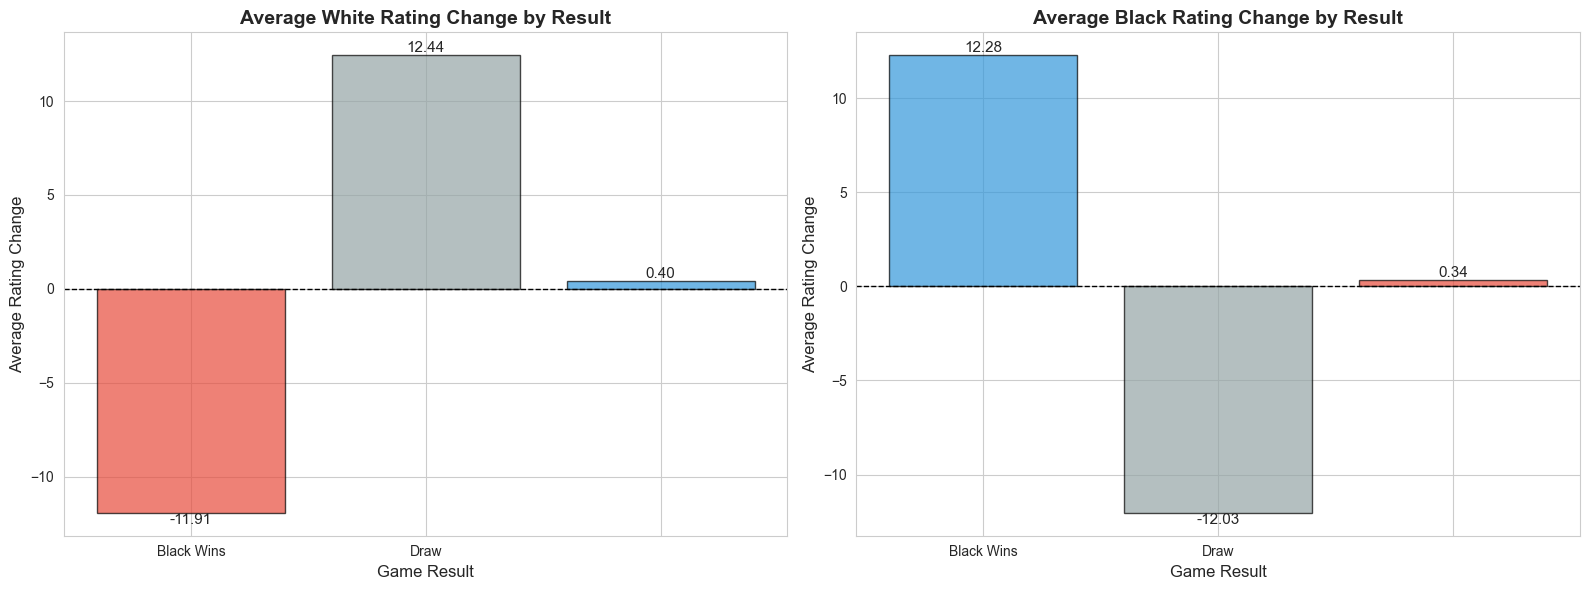


Average Rating Changes:

White Player:
  *: nan points
  0-1: -11.91 points
  1-0: 12.44 points
  1/2-1/2: 0.40 points

Black Player:
  *: nan points
  0-1: 12.28 points
  1-0: -12.03 points
  1/2-1/2: 0.34 points


In [37]:
# Q11: Rating changes by outcome
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# White rating changes
white_rating_by_result = df.groupby('Result')['WhiteRatingDiff'].mean()
bars1 = axes[0].bar(white_rating_by_result.index, white_rating_by_result.values,
                    color=['#3498db', '#e74c3c', '#95a5a6'], edgecolor='black', alpha=0.7)
axes[0].set_title('Average White Rating Change by Result', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Game Result', fontsize=12)
axes[0].set_ylabel('Average Rating Change', fontsize=12)
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0].set_xticklabels(['White Wins', 'Black Wins', 'Draw'])

# Add value labels
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=11)

# Black rating changes
black_rating_by_result = df.groupby('Result')['BlackRatingDiff'].mean()
bars2 = axes[1].bar(black_rating_by_result.index, black_rating_by_result.values,
                    color=['#e74c3c', '#3498db', '#95a5a6'], edgecolor='black', alpha=0.7)
axes[1].set_title('Average Black Rating Change by Result', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Game Result', fontsize=12)
axes[1].set_ylabel('Average Rating Change', fontsize=12)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_xticklabels(['White Wins', 'Black Wins', 'Draw'])

# Add value labels
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nAverage Rating Changes:")
print(f"\nWhite Player:")
for result, change in white_rating_by_result.items():
    print(f"  {result}: {change:.2f} points")
print(f"\nBlack Player:")
for result, change in black_rating_by_result.items():
    print(f"  {result}: {change:.2f} points")

## Summary

This analysis explored 11 key questions about chess games data:

1. **Game Results Distribution**: White has a slight advantage, with draws being less common
2. **ELO Distribution**: Ratings follow a normal distribution centered around intermediate levels
3. **ELO Difference Impact**: Higher rated players win more often, especially with larger rating gaps
4. **Popular Openings**: Certain openings like Sicilian Defense are extremely popular
5. **Opening Categories**: Different ECO categories show varying outcome patterns
6. **Time Controls**: Blitz and bullet games dominate online chess
7. **Time Control Effects**: Faster time controls have different outcome distributions
8. **Termination Reasons**: Most games end normally, with resignations being common
9. **Hourly Patterns**: Peak playing times show clear patterns throughout the day
10. **ELO and Draws**: Higher rated players draw more often
11. **Rating Changes**: Rating changes correlate logically with game outcomes

These insights help understand player behavior, game patterns, and the dynamics of online chess.